In [1]:
import gym

In [2]:
env = gym.make('FrozenLake-v0')

In [ ]:
print(env.observation_space.n) #get states
print(env.action_space.n) #get actions

In [15]:
env.reset() #reset to default env

0

In [24]:
action = env.action_space.sample() #get a random action

In [25]:
observation, reward, done, info = env.step(action) #tell the ai to perform the action generated above

In [ ]:
env.render()

#output:
# SFFF
# FHFH
# FFFH
# HFFG

In [ ]:
#ok we want the ai to reach "G" while avoiding "H" so how can we train it to do that??

In [3]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [5]:
Q = np.zeros((STATES,ACTIONS)) #creates a matrix with the actions and states, it is 0 because the ai didnt do any action
Q #4ACTIONs 16 states

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [6]:
EPISODES = 1000 #how many times to run the environment from the beginning
MAX_STEPS = 100 #max number of steps allowed for each run of environment

LEARNING_RATE = 0.81
GAMMA = 0.96

In [ ]:
epsilon = 0.9  #start with a 90% chance of picking a random action

if np.random.uniform(0,1) < epsilon:
  action = env.action_space.sample() #take a random action
else:
  action = np.argmax(Q[STATES, :]) #use the Q table to pick the best action that makes the state the gives most value

In [ ]:
Q[STATES, ACTIONS] = Q[STATES, ACTIONS] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[STATES, ACTIONS])

In [ ]:
#putting it all together

In [6]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500 #more episides the better
MAX_STEPS = 100

LEARNING_RATE = 0.81
GAMMA = 0.96

RENDER = False #if u want to see training set it to true

epsilon = 0.9

In [7]:
rewards = []
for episode in range(EPISODES):
  state = env.reset()
  for _ in range(MAX_STEPS):
    if RENDER:
      env.render()

    if np.random.uniform(0,1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break #reached goal

print(Q)
print(f"average reward: {sum(rewards)/len(rewards)}:")


[[1.28591825e-02 9.44152658e-03 1.10929210e-02 2.19489086e-01]
 [9.94186076e-03 1.00833307e-03 8.63259309e-03 1.55449105e-01]
 [1.12041902e-01 1.45401995e-02 1.34498915e-02 1.50089560e-02]
 [3.94867501e-03 6.78184216e-03 2.87020803e-03 1.56556790e-02]
 [1.22837841e-02 5.38084926e-03 6.96532684e-03 1.55450403e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.18613368e-05 3.35131379e-05 2.14446095e-02 4.59644251e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.51132091e-03 1.79447970e-03 5.85571791e-03 9.31287037e-02]
 [1.78695545e-03 3.94108983e-01 4.12171602e-03 1.67061245e-03]
 [1.95450296e-03 9.08642329e-02 1.10010145e-03 2.87871544e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.53216463e-01 1.74409859e-02 1.24664757e-01 1.20280201e-01]
 [6.61254148e-02 9.34196626e-01 1.79137958e-01 2.08223088e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

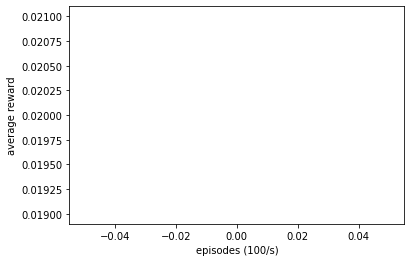

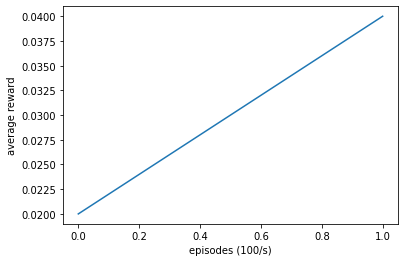

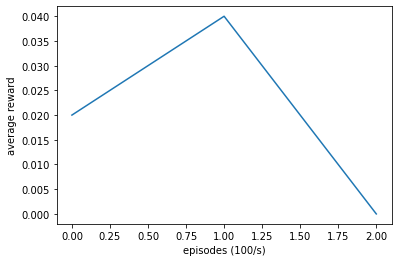

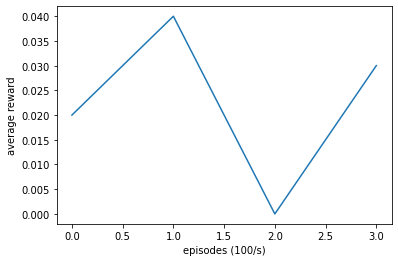

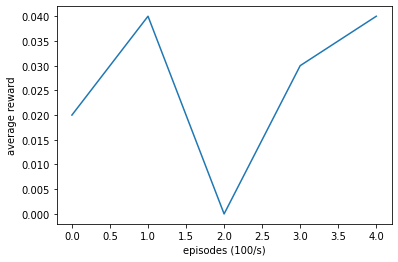

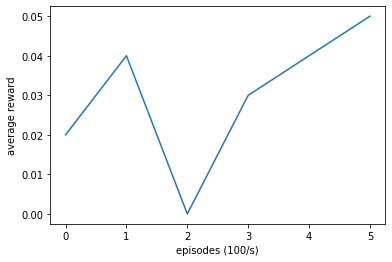

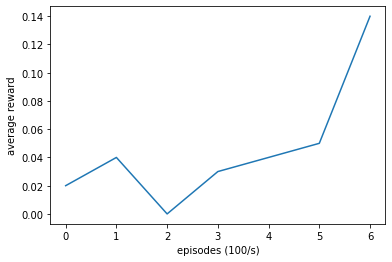

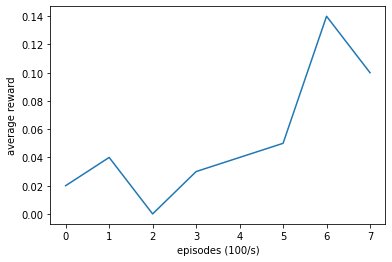

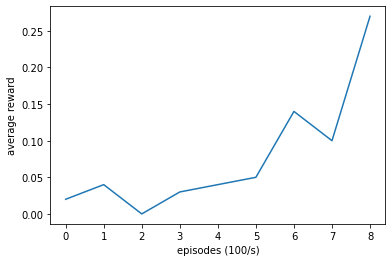

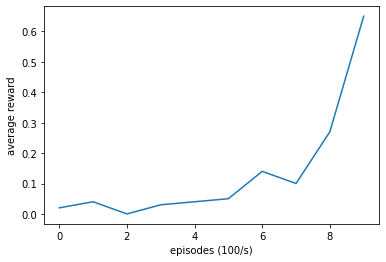

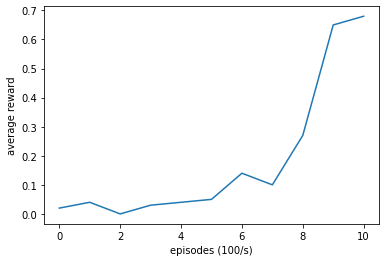

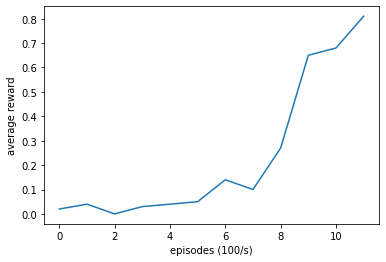

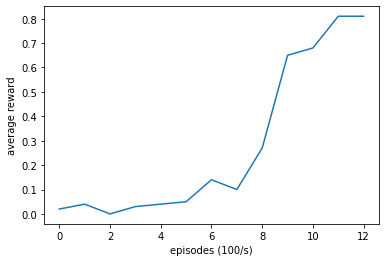

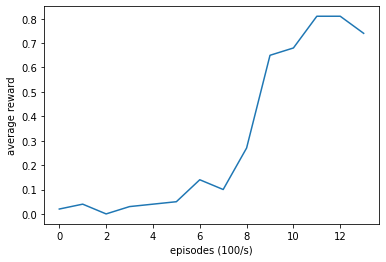

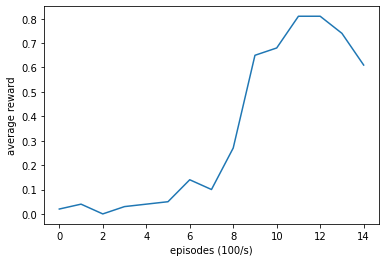

In [8]:
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))

  plt.plot(avg_rewards)
  plt.ylabel('average reward')
  plt.xlabel('episodes (100/s)')
  plt.show()